<a href="https://colab.research.google.com/github/chandankr111/Generative_AI/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [22]:
y_train = to_categorical(y_train , num_classes= 10 )


In [35]:
y_test = to_categorical(y_test , num_classes= 10 )

In [36]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

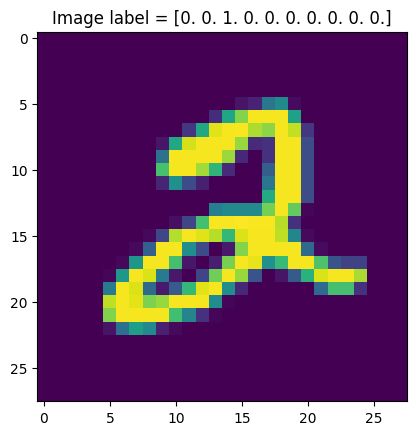

In [37]:
import matplotlib.pyplot as plt
plt.imshow( x_train[5])
plt.title(f"Image label = {y_train[5]}" )
plt.show()

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.utils import to_categorical

In [39]:
model = Sequential([
    Flatten(input_shape=(28,28)),  # input layer 784
    Dense(5,activation='relu'),   # hidden layer 5 neuron
    Dense(10,activation='softmax')  # outuput layer of 10 neuron
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer= 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [42]:
model.fit(x_train , y_train , epochs=5 , batch_size= 32 , verbose=2 )

Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.7466 - loss: 0.8340
Epoch 2/5
1875/1875 - 6s - 3ms/step - accuracy: 0.8420 - loss: 0.5235
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8668 - loss: 0.4618
Epoch 4/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8787 - loss: 0.4283
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.8859 - loss: 0.4105


In [44]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8740 - loss: 0.4469


[0.4022081196308136, 0.8894000053405762]

In [45]:
model.save('mnist.h5')

In [46]:
model.get_weights()

[array([[-0.01339822,  0.08544171,  0.0591937 , -0.08660557,  0.01234629],
        [-0.02501742, -0.02257835,  0.06045656, -0.02986866, -0.02638379],
        [ 0.08415322, -0.07624976, -0.08205238, -0.04997098, -0.0208487 ],
        ...,
        [ 0.07856408,  0.04004221, -0.07518318,  0.01411085, -0.08277957],
        [ 0.01165688, -0.04860902,  0.04688112,  0.0790121 , -0.00396041],
        [ 0.06804489,  0.02426422,  0.07203975, -0.06861487, -0.05132033]],
       dtype=float32),
 array([ 0.79023015, -0.11429381,  0.30333585, -0.30189672,  0.34900072],
       dtype=float32),
 array([[ 0.8082174 , -1.1242703 , -0.5562868 , -0.25986937,  0.439962  ,
          0.5181262 , -0.04844585,  0.5205941 ,  0.03654626,  0.4259173 ],
        [ 0.4255    , -0.59500736,  0.45234123,  0.540439  , -0.5458134 ,
         -0.02252398,  0.35998133, -0.88436973, -0.4507867 , -0.970678  ],
        [-1.1540027 ,  0.5801117 , -0.3664849 ,  0.74409354, -0.27684802,
         -0.61539626, -1.3966079 ,  0.779626